In [9]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [14]:
portfolio=wb.DataReader(['TCS.NS','WIT','INFY','TECHM.NS'],data_source='yahoo',start='2007-1-1')['Adj Close']

In [13]:
portfolio.head()

Symbols,TCS.NS,WIT,INFY,TECHM.NS
Date,,,,
2007-01-02,236.518204,NaN,NaN,335.666718
2007-01-03,242.514099,3.873821,5.083992,334.610962
2007-01-04,238.516846,3.864356,5.045740,330.096832
2007-01-05,239.265167,3.753135,5.022058,330.408447
2007-01-08,235.627899,3.734204,5.009307,337.395935


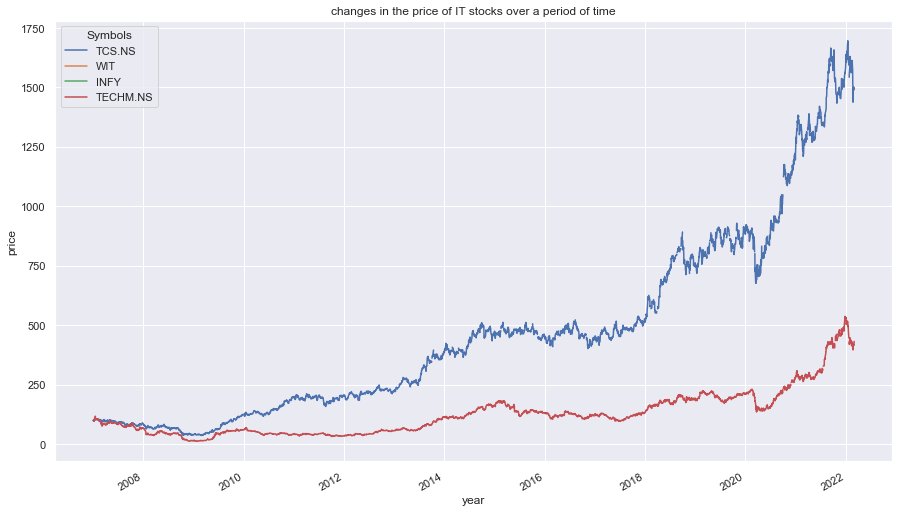

In [15]:
(portfolio/portfolio.iloc[0]*100).plot(figsize=(15,9));
plt.title('changes in the price of IT stocks over a period of time')
plt.xlabel('year')
plt.ylabel('price')
plt.show()

# here we can see that tcs outperforms every other IT company over the period of more than 13 years

In [18]:
portfolio_return=np.log(portfolio/portfolio.shift(1))
portfolio_return

Symbols,TCS.NS,WIT,INFY,TECHM.NS
Date,,,,
2007-01-02,NaN,NaN,NaN,NaN
2007-01-03,0.025034,NaN,NaN,-0.003150
2007-01-04,-0.016620,-0.002447,-0.007553,-0.013583
2007-01-05,0.003133,-0.029204,-0.004704,0.000944
2007-01-08,-0.015319,-0.005057,-0.002542,0.020927
...,...,...,...,...
2022-02-28,0.009456,-0.019022,-0.016777,0.014502
2022-03-01,NaN,-0.025001,-0.013447,NaN
2022-03-02,NaN,0.029108,0.019218,NaN


In [ ]:
# we will calculate risk indivually

In [22]:
portfolio_r=portfolio_return[['TCS.NS','WIT','INFY','TECHM.NS']]
portfolio_r.mean()*250

Symbols
TCS.NS      0.158418
WIT         0.041832
INFY        0.087277
TECHM.NS    0.102188
dtype: float64

In [ ]:
# from the above we can say that the the stock of TCS has given maximmun returns to investor compared to other IT stocks

In [19]:
portfolio_risk=portfolio_return[['TCS.NS','WIT','INFY','TECHM.NS']].std()*250**0.5
portfolio_risk

Symbols
TCS.NS      0.301626
WIT         0.375467
INFY        0.343922
TECHM.NS    0.376316
dtype: float64

In [20]:
# from riks perspective we can see that wipro  and tech mahindra carries maximuum amount of 
# risk compared to other IT stocks,TCS on the other hand carries the least risk

In [ ]:
# calculation corealtion and covariance

In [24]:
cov_matrix=portfolio_r.cov()
cov_matrix

Symbols,TCS.NS,WIT,INFY,TECHM.NS
Symbols,,,,
TCS.NS,0.000364,0.000148,0.000157,0.000201
WIT,0.000148,0.000564,0.000351,0.000145
INFY,0.000157,0.000351,0.000473,0.000138
TECHM.NS,0.000201,0.000145,0.000138,0.000566


In [ ]:
# calculation correlation 

In [25]:
corr_matrix=portfolio_r.corr()
corr_matrix

Symbols,TCS.NS,WIT,INFY,TECHM.NS
Symbols,,,,
TCS.NS,1.000000,0.330081,0.381464,0.442448
WIT,0.330081,1.000000,0.679648,0.260687
INFY,0.381464,0.679648,1.000000,0.270720
TECHM.NS,0.442448,0.260687,0.270720,1.000000


# now we will calculate portfolio risk

In [ ]:
# first we will tak eequallly weughter portfolio

In [27]:
weight=np.array([0.25,0.25,0.25,0.25])
#normal 
#(ab)^2
#but in case of matrices
#(a,B)^2=a^T(transpose)*(B*a)

In [29]:
#portfolio variance
pfolio_var=np.dot(weight.T,np.dot(portfolio_r.cov()*250,weight))#.T means transpose
pfolio_var

0.06637863791374471

# portfolio volatility

In [30]:
pfolio_vol=np.dot(weight.T,np.dot(portfolio_r.cov()*250,weight))**0.5
pfolio_vol

0.25764052071392946

In [32]:
print (str(round(pfolio_vol,5)*100))

25.764


In [ ]:
# our eqaully weighted portfolio  has a volatility of 25.76%

calculating diversiable and udiversiable risk in portfolio

#diversiable riks=portfolio variance- weighted annual variance
#'TCS.NS','WIT','INFY','TECHM.NS'

In [46]:
TCS_var_a=portfolio_return[['TCS.NS']].var()*250
TCS_var_a=float(TCS_var_a)

In [55]:
WIT_var_a=portfolio_return[['WIT']].var()*250
WIT_var_a=float(WIT_var_a)
WIT_var_a

0.14097509341274223

In [51]:
INFY_var_a=portfolio_return[['INFY']].var()*250
INFY_var_a=float(INFY_var_a)
INFY_var_a

0.11828223694239533

In [53]:
TECH_var_a=portfolio_return[['TECHM.NS']].var()*250
TECH_var_a=float(TECH_var_a)
TECH_var_a

0.14161360142976084

In [52]:
diverse_risk=pfolio_var-(weight[0]**2*TCS_var_a)-(weight[1]**2*INFY_var_a)-(weight[2]**2*TECH_var_a)-(weight[3]**2*WIT_var_a)
diverse_risk

0.03563805640042075

In [56]:
print(str(round(diverse_risk,3)))
# diversbiable risk is 0.36

0.036


## markowitz porfolio optimization

In [25]:
num_assets=4 # because we have  4 stocks

In [31]:
arr=np.random.random(4)
arr# to generrate random weigth

array([0.41855113, 0.50738534, 0.69000982, 0.44412509])

In [32]:
weights=np.random.random(num_assets)
weights /=np.sum(weights) # this will result in weight = 1
weights

array([0.20782547, 0.09874766, 0.24951746, 0.4439094 ])

In [33]:
weights[0]+weights[1]+weights[2]+weights[3] # always 1

1.0

In [35]:
# expecte portfolio return
log_returns=np.log(portfolio/portfolio.shift(1))
log_returns.mean()*250

Symbols
TCS.NS      0.158418
WIT         0.041831
INFY        0.087278
TECHM.NS    0.102188
dtype: float64

In [36]:
log_returns.cov()

Symbols,TCS.NS,WIT,INFY,TECHM.NS
Symbols,,,,
TCS.NS,0.000364,0.000148,0.000157,0.000201
WIT,0.000148,0.000564,0.000351,0.000145
INFY,0.000157,0.000351,0.000473,0.000138
TECHM.NS,0.000201,0.000145,0.000138,0.000566


In [37]:
log_returns.corr()

Symbols,TCS.NS,WIT,INFY,TECHM.NS
Symbols,,,,
TCS.NS,1.000000,0.330081,0.381464,0.442448
WIT,0.330081,1.000000,0.679648,0.260687
INFY,0.381464,0.679648,1.000000,0.270720
TECHM.NS,0.442448,0.260687,0.270720,1.000000


In [38]:
np.sum(weights*log_returns.mean())*250

0.10419339756541639

In [39]:
# portfolio variance
np.dot(weights.T,np.dot(weights,log_returns.cov()*250))

0.07059687134172091

In [40]:
# portfolio volatility 
np.sqrt(np.dot(weights.T,np.dot(weights,log_returns.cov()*250)))

0.2657007176161196

# we are not consdiering 1000 different investments
# we are considering 1000 different combination of same assets
# it can be 1% pg adn 99% gspc vice versa

In [41]:
# first we will create instance of pfolio return and voaltiliteis
pfolio_returns=[]
pfolio_volatilities=[]

for x in range(1000):
    weights=np.random.random(num_assets)
    weights /=np.sum(weights)
    pfolio_returns.append(np.sum(weights*log_returns.mean())*250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(weights,log_returns.cov()*250))))

In [42]:
pfolio_returns,pfolio_volatilities

([0.10903875508712979,
  0.10690317862143414,
  0.09176156497727762,
  0.08501658611552482,
  0.09181977398770048,
  0.08282361410941474,
  0.08958952007112828,
  0.0914158611786798,
  0.07660820936580671,
  0.09900116389351318,
  0.08742702058473463,
  0.0927786754716156,
  0.09700111886589438,
  0.1129684768295615,
  0.09288643070402565,
  0.09082791680918993,
  0.10001714490645762,
  0.09383131248658567,
  0.11299981083353515,
  0.13003533328440822,
  0.11754977249732138,
  0.09205947729743173,
  0.09963783962741352,
  0.07983609848018486,
  0.08413988926548063,
  0.10040407925638496,
  0.09854949653318419,
  0.08389378702554996,
  0.07404636115329319,
  0.12732843473813146,
  0.12324122457686457,
  0.10316771858835566,
  0.11408128700069974,
  0.1143330248146609,
  0.09604023916236812,
  0.10023385386608717,
  0.11046471854646524,
  0.09534633557666629,
  0.12563009739114517,
  0.07014785844850813,
  0.09716690893770494,
  0.0810114053524529,
  0.11940713159930977,
  0.108029965452

In [43]:
pfolio_returns=np.array(pfolio_returns)
pfolio_volatilities=np.array(pfolio_volatilities)

In [44]:
pfolio_returns,pfolio_volatilities

(array([0.10903876, 0.10690318, 0.09176156, 0.08501659, 0.09181977,
        0.08282361, 0.08958952, 0.09141586, 0.07660821, 0.09900116,
        0.08742702, 0.09277868, 0.09700112, 0.11296848, 0.09288643,
        0.09082792, 0.10001714, 0.09383131, 0.11299981, 0.13003533,
        0.11754977, 0.09205948, 0.09963784, 0.0798361 , 0.08413989,
        0.10040408, 0.0985495 , 0.08389379, 0.07404636, 0.12732843,
        0.12324122, 0.10316772, 0.11408129, 0.11433302, 0.09604024,
        0.10023385, 0.11046472, 0.09534634, 0.1256301 , 0.07014786,
        0.09716691, 0.08101141, 0.11940713, 0.10802997, 0.09682651,
        0.10144676, 0.11448323, 0.11050331, 0.10535926, 0.08279454,
        0.1318754 , 0.10392317, 0.11437276, 0.07984258, 0.07963816,
        0.06969889, 0.09541984, 0.1137915 , 0.09404369, 0.0784653 ,
        0.07798505, 0.0864275 , 0.10066359, 0.0951599 , 0.10036666,
        0.11798669, 0.10230339, 0.10866693, 0.09649112, 0.11140409,
        0.08444595, 0.09495191, 0.10073504, 0.09

In [45]:
portfolios=pd.DataFrame({'Return':pfolio_returns,'volatility':pfolio_volatilities})

In [46]:
portfolios.head()

,Return,volatility
0,0.109039,0.256191
1,0.106903,0.261026
2,0.091762,0.281060
3,0.085017,0.287437
4,0.091820,0.262834


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0, 0.5, 'expected_return')

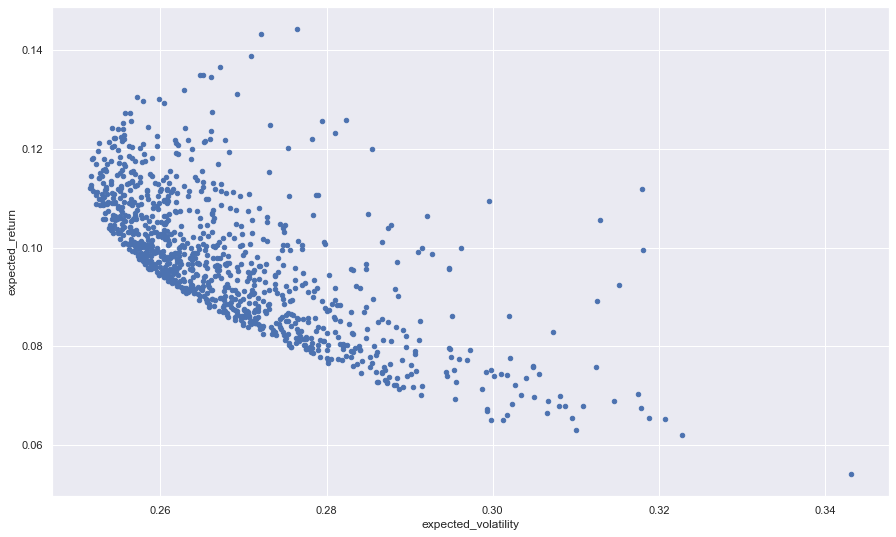

In [48]:
portfolios.plot(x='volatility',y='Return',kind='scatter',figsize=(15,9))
plt.xlabel('expected_volatility')
plt.ylabel('expected_return')